In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [6]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [7]:
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')

In [8]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [9]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [11]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


In [12]:
x = df.drop('Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']

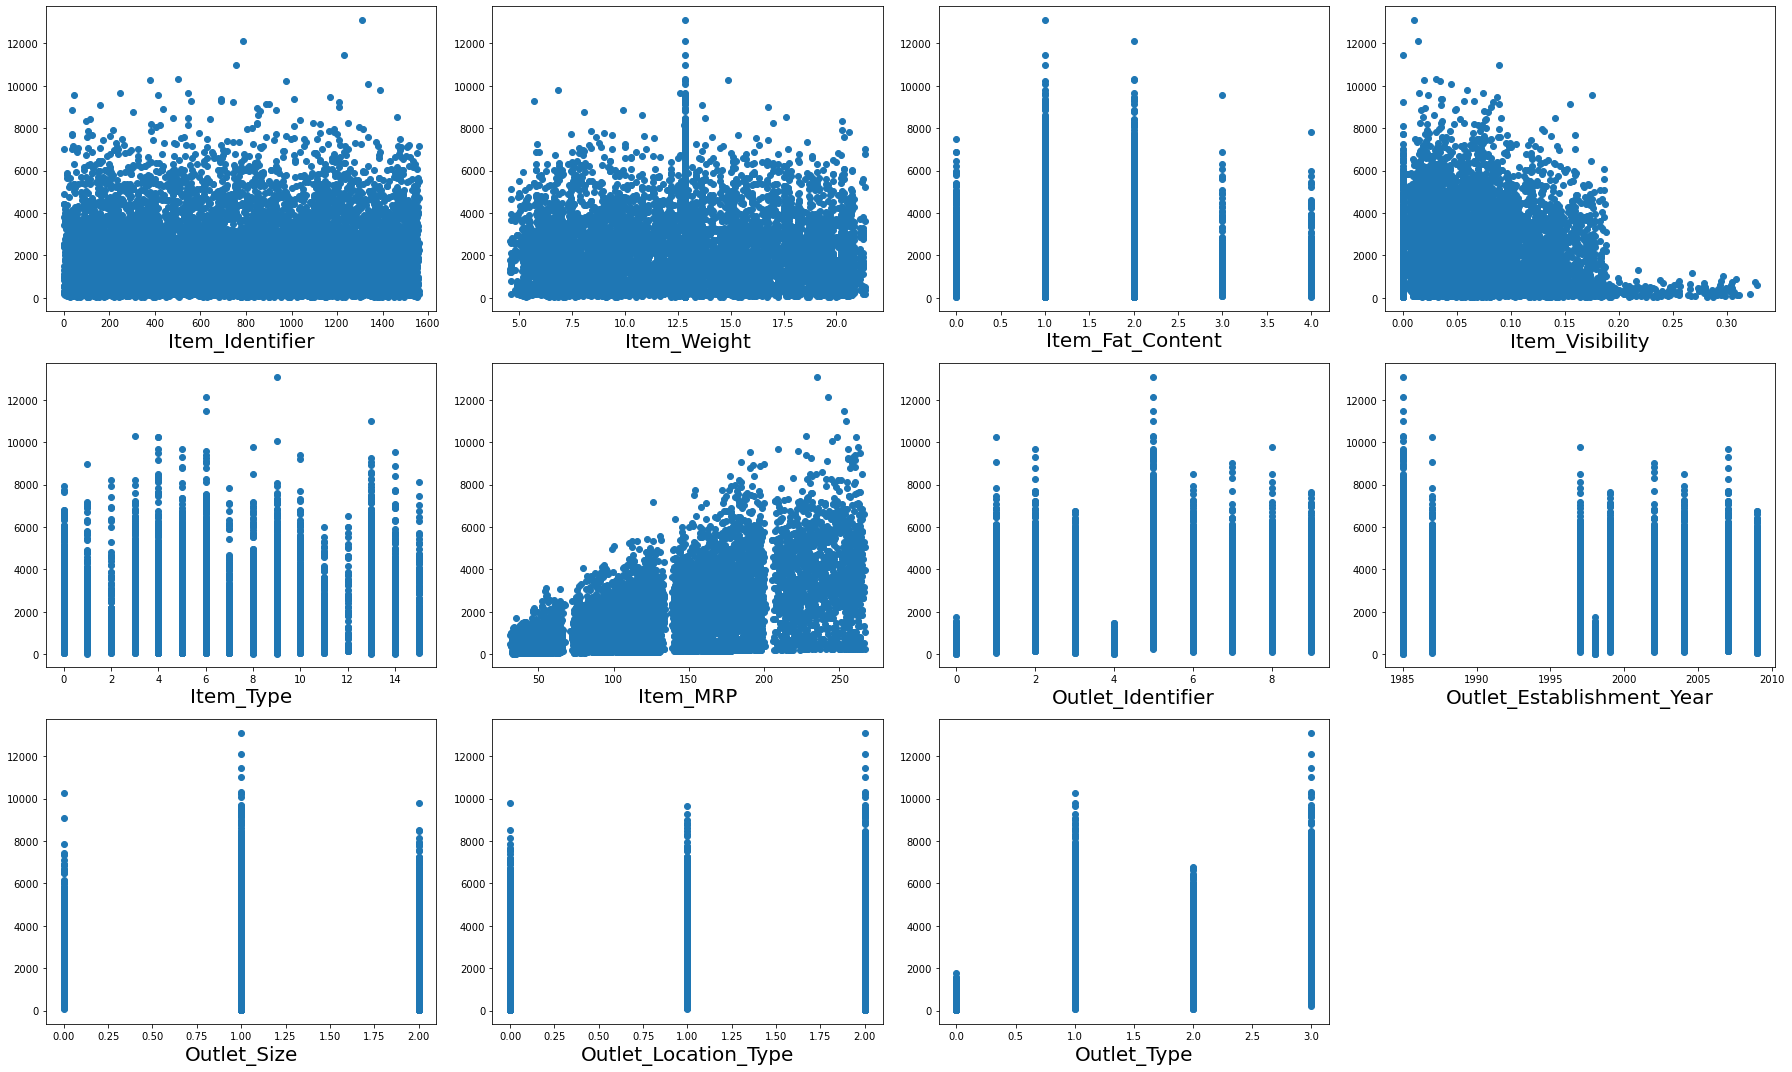

In [13]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

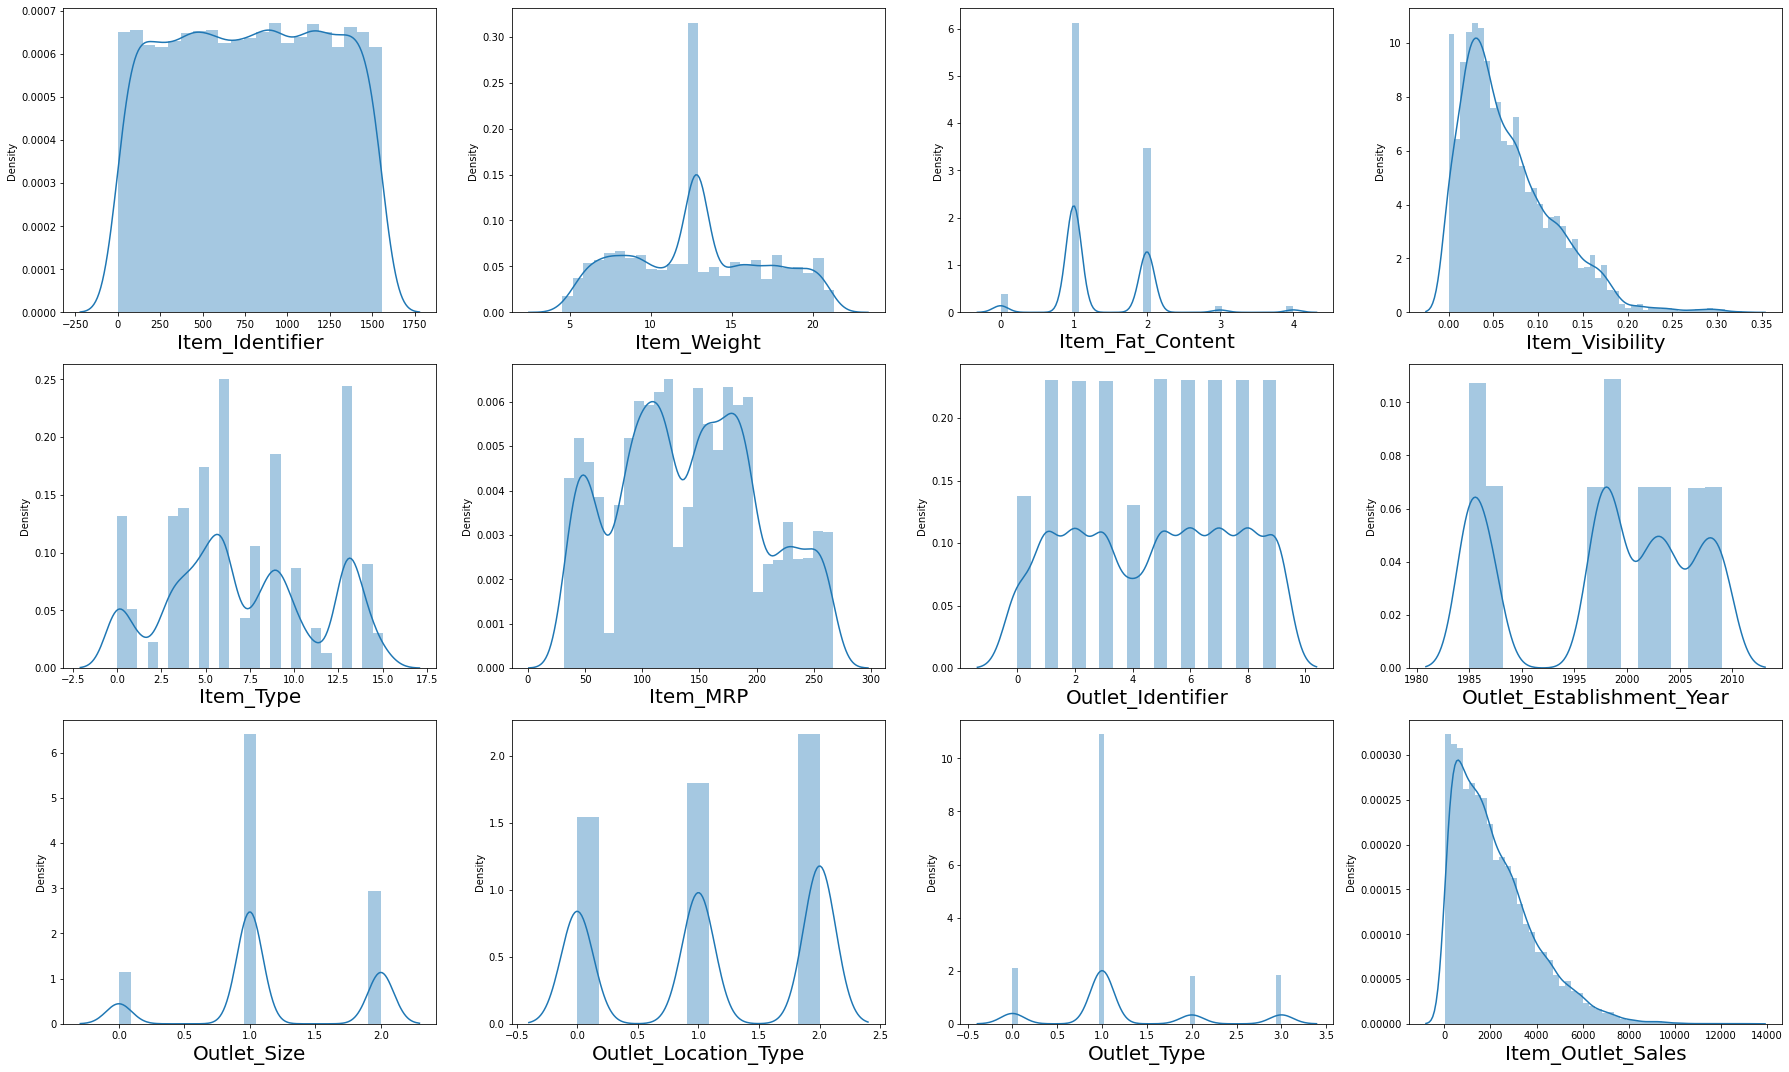

In [14]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in df:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [15]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
df.drop('Item_Outlet_Sales',axis=1).corrwith(df.Item_Outlet_Sales)

Item_Identifier              0.002869
Item_Weight                  0.011550
Item_Fat_Content             0.009800
Item_Visibility             -0.128625
Item_Type                    0.017048
Item_MRP                     0.567574
Outlet_Identifier            0.162325
Outlet_Establishment_Year   -0.049135
Outlet_Size                 -0.086182
Outlet_Location_Type         0.089367
Outlet_Type                  0.401522
dtype: float64

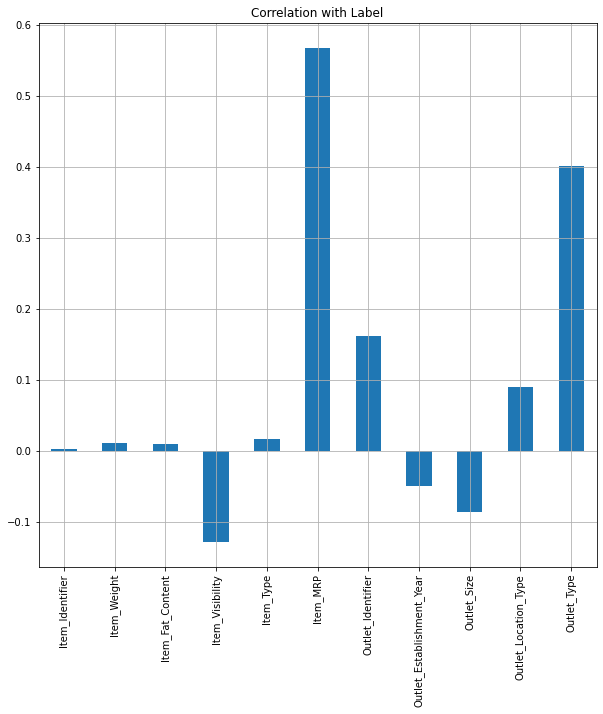

In [17]:
df.drop('Item_Outlet_Sales',axis=1).corrwith(df.Item_Outlet_Sales).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

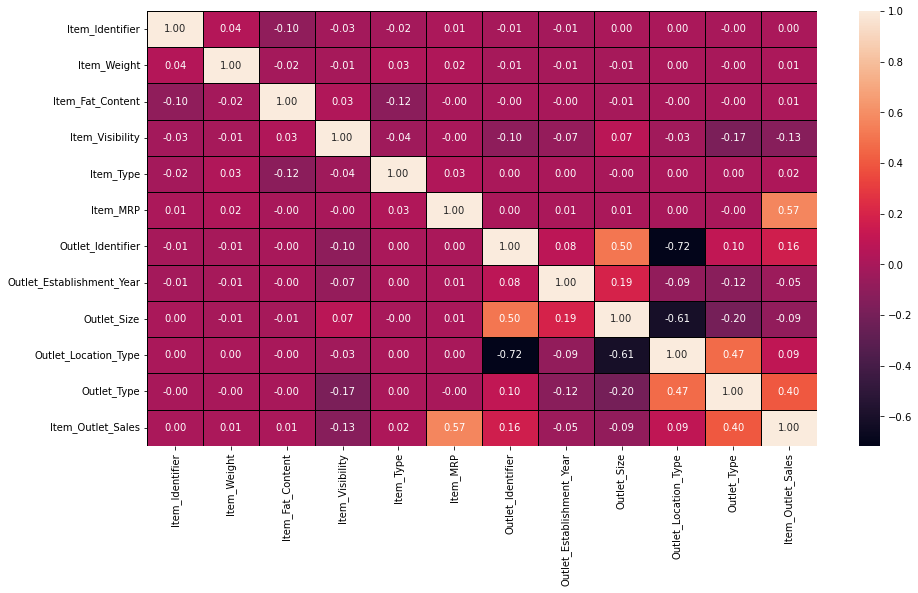

In [18]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

In [19]:
df = df.drop(['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Type'],axis=1)

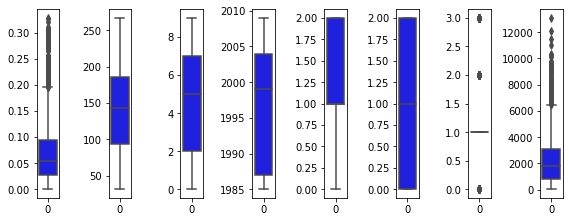

In [20]:
a = df.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = df[a[i]],color='blue',orient='v')
    plt.tight_layout()

In [21]:
print('Item_Visibility Highest allowed',df['Item_Visibility'].mean()+3*df['Item_Visibility'].std())
print('Item_Visibility Lowest allowed',df['Item_Visibility'].mean()-3*df['Item_Visibility'].std())
print('\n')

Item_Visibility Highest allowed 0.22092549574235687
Item_Visibility Lowest allowed -0.08866143818445432




In [22]:
df1=df[(df['Item_Visibility']<0.22)]

In [23]:
df1.reset_index()

,index,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,0.016047,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,1,0.019278,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,2,0.016760,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,3,0.000000,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,4,0.000000,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...
8421,8518,0.056783,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8422,8519,0.046982,108.1570,7.0,2002,1.0,1.0,1.0,549.2850
8423,8520,0.035186,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8424,8521,0.145221,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [24]:
x = df1.drop('Item_Outlet_Sales',axis=1)
y = df1['Item_Outlet_Sales']

In [25]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

# LinearRegression

In [26]:
reg= LinearRegression()

In [27]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    reg.fit(x_train, y_train)
    x_pred = reg.predict(x_train)
    y_pred = reg.predict(x_test)
    print("At Random state", (i), "the training accuracy is :-", (r2_score (y_train,x_pred)))
    print("At Random state", (i), "the testing accuracy is :-", (r2_score (y_test,y_pred)))
    print('\n')

At Random state 0 the training accuracy is :- 0.5097555578033888
At Random state 0 the testing accuracy is :- 0.4977056924230824


At Random state 1 the training accuracy is :- 0.5101646652409606
At Random state 1 the testing accuracy is :- 0.4960304771020808


At Random state 2 the training accuracy is :- 0.5083892025291634
At Random state 2 the testing accuracy is :- 0.5019558028432489


At Random state 3 the training accuracy is :- 0.5051677504660967
At Random state 3 the testing accuracy is :- 0.5102038933040737


At Random state 4 the training accuracy is :- 0.5045710460791035
At Random state 4 the testing accuracy is :- 0.5124267703876583


At Random state 5 the training accuracy is :- 0.502263710454209
At Random state 5 the testing accuracy is :- 0.5205051107651861


At Random state 6 the training accuracy is :- 0.5023099407320758
At Random state 6 the testing accuracy is :- 0.519622550488057


At Random state 7 the training accuracy is :- 0.5015849791076172
At Random state 7 th

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 4)

In [29]:
reg.score(x_train, y_train)

0.5044189440921574

In [30]:
y_pred = reg.predict(x_test)
reg.score(x_test, y_test)

0.512530055837675

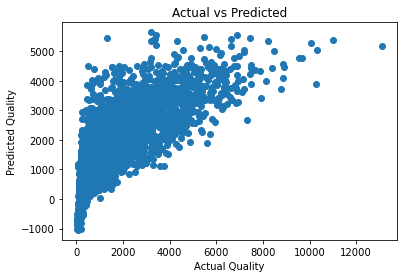

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted')
plt.show()

In [32]:
print ('r2_score',r2_score (y_test,y_pred))
print ('mean_absolute_error',mean_absolute_error(y_test,y_pred))
print ('mean_squared_error',mean_squared_error (y_test,y_pred))

r2_score 0.512530055837675
mean_absolute_error 911.4159255274883
mean_squared_error 1506572.9958842848


In [33]:
Lassocv = LassoCV(alphas = None, max_iter = 100, normalize = True)
Lassocv.fit(x_train, y_train)
alpha = Lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)
lasso_reg.score(x_test, y_test)

0.5124260986445569

In [34]:
rdgcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
rdgcv.fit(x_train, y_train)
rd_model = Ridge(alpha=rdgcv.alpha_)
rd_model.fit(x_train, y_train)
rd_model.score(x_test, y_test)

0.5124267633011295

# DecisionTreeRegressor

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 4)

In [36]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [37]:
dtr.score(x_train,y_train)

1.0

In [38]:
y_pred = dtr.predict(x_test)
dtr.score(x_test, y_test)

0.2296761140516409

In [39]:
metrics.r2_score(y_test, y_pred)

0.2296761140516409

# AdaBoostRegressor

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 4)

In [41]:
ada = AdaBoostRegressor()

In [42]:
ada.fit(x_train, y_train)

AdaBoostRegressor()

In [43]:
x_pred = ada.predict(x_train) 

In [44]:
accuracy = metrics.r2_score(y_train, x_pred)
accuracy

0.5388375159649506

In [45]:
y_pred = ada.predict(x_test) 
ada.score(x_test, y_test)

0.5378548457023162

In [46]:
metrics.r2_score(y_test, y_pred)

0.5378548457023162

# GradientBoostingRegressor

In [47]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 4)

In [48]:
gbdt = GradientBoostingRegressor()
gbdt.fit(x_train, y_train)

GradientBoostingRegressor()

In [49]:
x_pred = gbdt.predict(x_train) 

In [50]:
accuracy = metrics.r2_score(y_train, x_pred)
accuracy

0.6278661650856168

In [51]:
y_pred = gbdt.predict(x_test) 
gbdt.score(x_test, y_test)

0.5974516039727122

In [52]:
metrics.r2_score(y_test, y_pred)

0.5974516039727122

# RandomForestRegressor

In [53]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 4)

In [54]:
rand = RandomForestRegressor()
rand.fit(x_train,y_train)

RandomForestRegressor()

In [55]:
y_pred=rand.predict(x_test)

In [56]:
rand.score(x_test, y_test)

0.5553321268874953

In [57]:
metrics.r2_score(y_test, y_pred)

0.5553321268874953

In [58]:
x_pred = rand.predict(x_train) 

In [59]:
accuracy = metrics.r2_score(y_train, x_pred)
accuracy

0.9356070516392309

# Findings

- LinearRegression train accuracy score 50.44% and test accuracy score 51.25%
- DecisionTreeRegressor train accuracy score 100% and test accuracy score 23.35%
- AdaBoostRegressor train accuracy score 54.40% and test accuracy score 54.46%
- GradientBoostingRegressor train accuracy score 62.79% and test accuracy score 59.75%
- RandomForestRegressor train accuracy score 93.62% and test accuracy score 55.22%

### Selecting GradientBoostingRegressor since the Accuracy score and test scores are greater and clsoe to each other.

In [74]:
file = 'Big_Data_Mart_Sales.pickle'
pickle.dump(gbdt, open(file, 'wb'))

## Predicting Sales for Test Data

In [75]:
df_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [76]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [77]:
df_test['Item_Weight']=df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())
df_test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [78]:
df_test['Outlet_Size']=df_test['Outlet_Size'].fillna('Medium')

In [79]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [80]:
for i in df_test.columns:
    if df_test[i].dtypes=='object':
        df_test[i]=enc.fit_transform(df_test[i].values.reshape(-1,1))

In [81]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103.0,20.750000,1.0,0.007565,13.0,107.8622,9.0,1999,1.0,0.0,1.0
1,1067.0,8.300000,4.0,0.038428,4.0,87.3198,2.0,2007,1.0,1.0,1.0
2,1406.0,14.600000,1.0,0.099575,11.0,241.7538,0.0,1998,1.0,2.0,0.0
3,809.0,7.315000,1.0,0.015388,13.0,155.0340,2.0,2007,1.0,1.0,1.0
4,1184.0,12.695633,2.0,0.118599,4.0,234.2300,5.0,1985,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
5676,231.0,10.500000,2.0,0.013496,13.0,141.3154,8.0,1997,2.0,0.0,1.0
5677,306.0,7.600000,2.0,0.142991,15.0,169.1448,3.0,2009,1.0,2.0,2.0
5678,1412.0,10.000000,1.0,0.073529,8.0,118.7440,7.0,2002,1.0,1.0,1.0
5679,517.0,15.300000,2.0,0.000000,3.0,214.6218,2.0,2007,1.0,1.0,1.0


In [82]:
df_test = df_test.drop(['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Type'],axis=1)

In [83]:
load_model = pickle.load(open(file , 'rb'))

In [84]:
a = load_model.predict(scaler.transform(df_test))

In [85]:
len(a)

5681

In [86]:
df_test['Sales']= a

In [87]:
df_test

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales
0,0.007565,107.8622,9.0,1999,1.0,0.0,1.0,1672.464370
1,0.038428,87.3198,2.0,2007,1.0,1.0,1.0,1405.243488
2,0.099575,241.7538,0.0,1998,1.0,2.0,0.0,525.218644
3,0.015388,155.0340,2.0,2007,1.0,1.0,1.0,2593.046685
4,0.118599,234.2300,5.0,1985,1.0,2.0,3.0,5846.813361
...,...,...,...,...,...,...,...,...
5676,0.013496,141.3154,8.0,1997,2.0,0.0,1.0,2151.437530
5677,0.142991,169.1448,3.0,2009,1.0,2.0,2.0,2519.805808
5678,0.073529,118.7440,7.0,2002,1.0,1.0,1.0,1856.186430
5679,0.000000,214.6218,2.0,2007,1.0,1.0,1.0,3773.061521
